In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

DOĞRUSAL REGRESYON

In [ ]:
df = pd.read_csv('advertising.csv')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
x = df[['TV']]
y = df[['sales']]

In [ ]:
reg_model = LinearRegression().fit(x,y)

In [ ]:
# y_hat = b + w.x  x -> burada tv
# b(sabit) = intercept_
# w(katsayı) = coef_
reg_model.intercept_[0]
reg_model.coef_[0][0]
# reg_model.intercept_[0] + reg_model.coef_[0][0].tv

0.04753664043301975

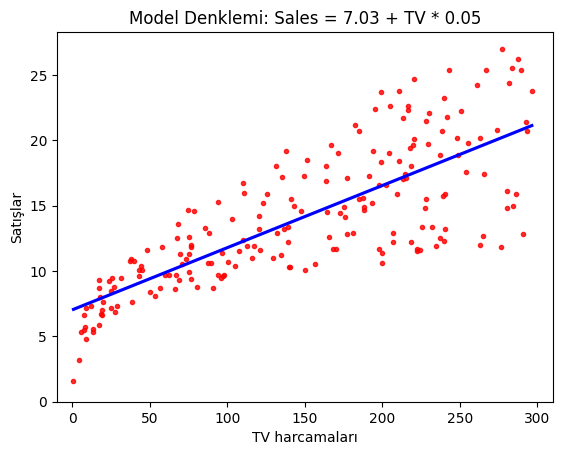

In [ ]:
g = sns.regplot(x=x, y=y, scatter_kws = {'color': 'r', 's': 9}, ci = False, line_kws = {'color': 'b'})
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0],2)} + TV * {round(reg_model.coef_[0][0],2)}")
g.set_ylabel("Satışlar")
g.set_xlabel("TV harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom = 0)
plt.show()

MSE ve MAE Başarı Tahmini

In [ ]:
y_pred = reg_model.predict(x)
mean_squared_error(y, y_pred)

10.512652915656757

In [ ]:
y_mean = y.mean()
y_std = y.std()
y_mean, y_std
# mse 10 çıktı. y ortalama 14 std 5  benim mse değerim buna göre çok yüksek 14 ortalama olan değerden hata olarak
# 10 birim aşağı veya yukarı tahmin yapamam

(sales   14.02
 dtype: float64,
 sales   5.22
 dtype: float64)

In [ ]:
mean_absolute_error(y, y_pred)

2.549806038927486

R2 SKORU

In [ ]:
f"%{reg_model.score(x,y)*100}"

'%61.187505085007096'

ÇOKLU DOĞRUSAL REGRESYON

In [ ]:
x = df.drop('sales', axis = 1)
y = df[['sales']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)
reg_model = LinearRegression().fit(x_train, y_train)

In [ ]:
test_score = reg_model.score(x_test, y_test)
train_score = reg_model.score(x_train, y_train)
print(f"Eğitim R2 Skoru: {train_score}\nTest R2 Skoru: {test_score}")

Eğitim R2 Skoru: 0.8959372632325174
Test R2 Skoru: 0.8927605914615384


K-Katlı Çapraz Doğrulama

In [ ]:
np.mean(np.sqrt(-cross_val_score(reg_model,x,y,cv=10,scoring="neg_mean_squared_error")))
# 9 parça ile eğit 1 parça ile test et bunu 10 kere farklı parçalar ile tekrar et

1.6913531708051797